# Продвинутый Python, лекция 13

**Лектор:** Петров Тимур

**Семинаристы:** Бузаев Федор, Дешеулин Олег, Коган Александра, Васина Олеся, Садуллаев Музаффар

## Поговорим про аналитику

Итак, давайте поговорим про другую часть жизни, а именно про аналитику. Если вы зайдете на сайт вакансий, то увидите просто бесконечное многообразие:

* Бизнес-аналитик

* Аналитик данных

* Продуктовый аналитик

* Системный аналитик

* Маркетинговый аналитик

* BI-аналитик

И так далее. Что их объединяет? Аналитика занимается сбором и обработкой информации для получения полезной инфы (а дальше уже в зависимости от деятельности выводы и профиль исследований бывает разный)

Мы с вами сегодня поговорим больше про продуктовую аналитику, но тем не менее, все эти вещи полезны также и для других сфер анализа.

Чем занимается продуктовый аналитик?

* Оценка эффективности продукта (как он вообще живет, все ли ок)

* Выделение ключевых метрик

* Исследование потребностей и инсайтов в поведении пользователей

* Проведение АБ-тестов для оценки эффективности той или иной фичи, добавленной в продукт



## На чем основывается аналитик?

Очевидно - на данных, которые имеем. Чаще всего инструменты аналитика это:

* SQL (которого мы уже так или иначе коснулись)

* Python (вот он, наш любимый родной)

Мы же поговорим про две части: АБ-тестирование и про визализацию (это достаточно большая часть жизни аналитика). И начнем с АБ

## Что такое AB-тест и с чем его кушать

AB-тест - по сути это сравнение двух версий разного продукта:

![](https://avatars.dzeninfra.ru/get-zen_doc/271828/pub_6563b818e129441f1f1eed60_6563b9b6dc9c916024dcbdb6/scale_1200)

Вот приходит к вам команда и говорит: хотим поменять расположение иконки на сайте, бизнес считает, что так будет лучше. Естественно, просто подумать и сделать - это не вариант (а вдруг бизнес думает неверно). Поэтому мы запускаем проверку, а действительно ли так лучше (вообще принятия решений на основе данных называется data-driven подход, и обычно это показатель, что в бизнесе в целом все неплохо)

А как проверить?

* Бьем пользователей на две равные части: группа А (контроль) и группа B (тест). Для группы А оставляем все как и было раньше, а для группы B мы меняем расположение иконки (или любое другое изменение)

* Пускаем и ждем некоторое время, пока наберутся данные

* После этого берем и сравниваем, что же было лучше, и уже на основе этого анализа делаем выбор - PROFIT

## Ну так изи, что тут еще делать, все очевидно!

Ну, если бы было так просто, то и аналитики были бы не нужны)

Какие есть проблемы?

1. А как побить на равные части?

2. А сколько времени ждать данные?

3. А как итоги подводить, на основании чего?

Вот для этого нам придется немного погрузиться в матстат (будет небольно, обещаю)

## Основа

Что такое AB-тест с формальной точки зрения? По сути, это проверка гипотезы (одна из частей матстата)

Допустим, что у нас есть некоторая гипотеза (например: если мы сделаем фичу X, то у нас повысится средний чек). Что мы хотим сказать?

$$H_0 : T(x_a) = T(x_b) $$

$$H_1: T(x_1) \ne T(x_b) $$

То есть при т.н. "нулевой гипотезе" (ей называют ситуацию, когда ничего не изменится) наша метрика (средний чек) не поменяется (будет та же самая)

А альтернативная гипотеза - что поменяется (причем обратите внимание, мы не говорим в какую сторону - нам важно следить за тем, что она может стать меньше!)

Наша задача: понять, какая гипотеза верна (по сути принять ее)

Звучит логично. Давайте проверять:

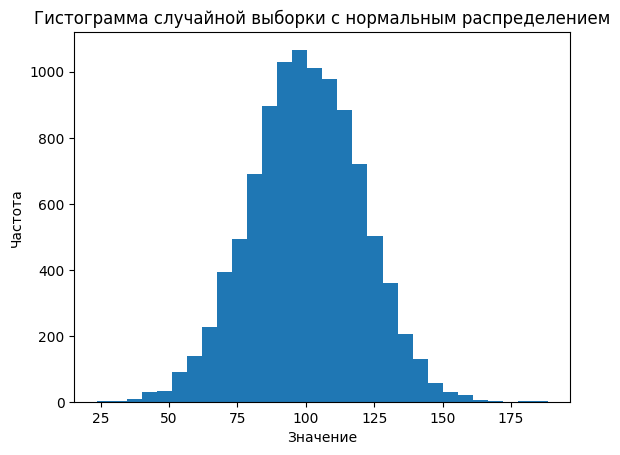

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.normal(loc=100, scale=20, size=10000)
plt.hist(data, bins=30)
plt.title('Гистограмма случайной выборки с нормальным распределением')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Сгенерировали нормальную выборку, где среднее - 100 (будем считать, что это наши данные для проверки). В целом можем сказать - вот люди в среднем тратили 100 у.е. у нас

Сгенерируем такую же выборку (как будто альтернатива):

In [9]:
data_a = np.random.normal(loc=100, scale=20, size=1000)
data_b = np.random.normal(loc=100, scale=20, size=1000)
print(np.mean(data_a), np.mean(data_b))

100.32530169137405 99.80158806076413


Ну вот, получили, что средние расходятся (они не равны), можем делать вывод, что второй вариант хуже?

Наверное, нет, мы с вами знаем, что из себя представляют данные и так не можем утверждать (знаем, что там все одинаково). А в реальной жизни мы с вами истинного распределения даже часто не знаем. Что делать?

Варианта 2:

* НУЖНО БОЛЬШЕ ДАННЫХ  (валидно, но чаще всего недостижимо, бизнес требует решений более быстрых, чем за бесконечность времени)

* Проверять более умно

## Стат критерии

Итак, втупую сравнивать не вариант. Что делать? Надо применять стакритерии, которые вам скажут по сути следующее:

**С какой вероятностью полученные данные действительно отличаются?**

И тут нужно поговорить про, собственно, сами ошибки. Табличка в помощь:

![](https://avatars.mds.yandex.net/i?id=467fb9d4b9a6888123ea3ff4ed804c9f_l-5205562-images-thumbs&n=13)

Ошибки первого рода: мы приняли альтернативую гипотезу, когда была верна нулевая (ничего менять не надо было)

Ошибки второго рода: мы отвергли альтернативную гипотезу, когда ее надо было принять (надо было менять)

Также $\alpha$ называется стат. значимостью (к этому мы вернемся позже), а величину $1 - \beta$ - стат мощностью

В зависимости от того, насколько вы допускаете ту или иную ошибку, вы меняете вероятность. По дефолту ставят $\alpha = 0.05$ и $\beta = 0.2$ (но их можно менять)

Вы можете сказать: а зачем так ставить, если в идеале нам бы поставить везде по нулям? (чтобы вот прям наверняка)



Тут надо сказать про такую вещь, как MDE (minimal detectable effect). Что это такое? Это величина, которая говорит: **"какое минимальное расхождение должно быть, чтобы мы могли достоверно сказать, что действительно что-то отличается?"**

Ну и теперь, логично, что он зависит от заданных параметров:

![](https://miro.medium.com/v2/resize:fit:1200/1*xrZ29Im-Nvljt_2AFtmE4g.png)

$$\text{MDE} = \left( z_{\frac{\alpha}{2}} + z_{\beta} \right) \cdot \sqrt{\frac{2 \cdot \hat{\sigma}^2}{n}}
$$

MDE зависит от $\alpha$ и $\beta$, а также от числа наблюдений, поэтому мы обычно по MDE как раз вычисляем необходимые выборки (а следовательно, и время ожидания)

Вот после всего этого можно и говорить про критерии? Какие они бывают?

* Параметрические (T-test)

* Непараметрические (Манн-Уитни)

* Бутсрап

## T-test

Критерий Стюдента-Уэлча - классический параметрический критерий для проверки гипотез.

Что он требудет: независимые нормальные выборки. Проверяем, равны ли средние у двух выборок

Когда подходит: когда у вас выборка из нормального распреление и когда у вас много данных (если на тервере уже проходили ЦПТ, то в целом ЦПТ об этом и говорит, и поэтому его можно применять)

Мы сейчас не будем останавливаться на теор выкладках, мы просто укажем формулу:

$$t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$

Это наш критерий, который мы сравниваем с распределение Стьюдента с $df$ степенями свободы, где:

$$\text{df} = \frac{\left( \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2} \right)^2}{\frac{\left( \frac{S_1^2}{n_1} \right)^2}{n_1 - 1} + \frac{\left( \frac{S_2^2}{n_2} \right)^2}{n_2 - 1}}
 $$

На основе этого принимаем

In [16]:
import numpy as np

def welch_ttest(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)
    t_stat = (mean1 - mean2) / np.sqrt(var1 / n1 + var2 / n2)
    df = ((var1 / n1 + var2 / n2) ** 2) / (( (var1 / n1) ** 2) / (n1 - 1) + ((var2 / n2) ** 2) / (n2 - 1))
    return t_stat, df

np.random.seed(42)
sample1 = np.random.normal(loc=50, scale=10, size=100)
sample2 = np.random.normal(loc=50, scale=10, size=100)
t_stat, df = welch_ttest(sample1, sample2)

print(f"t-статистика: {t_stat}")
print(f"Степени свободы: {df}")


t-статистика: -0.9579319437618322
Степени свободы: 197.5286743143973


In [17]:
from scipy.stats import t

alpha = 0.05
p_value = 2 * (1 - t.cdf(abs(t_stat), df)) # это наш уровень значимости: какова вероятность, что мы получили случайно такое значение
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")

Не отвергаем нулевую гипотезу


## Манн-Уитни

Непараметрический критерий (то есть не требует ничего по отношению к расрпределению наших данных), который чаще всего используют в тех ситуациях, когда у нас данные категориальные (например, вы хотите понять - оценки у вас поменялись в отзывах или нет, тут уже t-test не будет просто работать, у вас все дискретно)

Однако, тест Манна-Уитни проверяет немного другое: а отличаются ли вообще выборки или нет. То есть он не говорит: стало лучше, стало ли хуже, а просто: есть ли разница или нет

Еще один плюс такого теста: он устойчив к выбросам (когда же t-test может из-за этого страдать)

А еще он максимально простой)

1. Объединяем выборки

2. Ранжируем по параметру и присваем каждому ранг (от 1 до N)

3. Считаем статистики:

$$U_1 = R_1 - \frac{n_1 (n_1 + 1)}{2}$$

$$U_2 = R_2 - \frac{n_2 (n_2 + 1)}{2}$$

4. Берем минимум из них и при заданном уровне статзначимости сравниваем с распределением Манна-Уитни

In [18]:
import numpy as np
from scipy.stats import mannwhitneyu

np.random.seed(14)
sample1 = np.random.normal(loc=50, scale=10, size=100)
sample2 = np.random.normal(loc=50, scale=10, size=100)
stat, p_value = mannwhitneyu(sample1, sample2, alternative='two-sided')

print(f"stat: {stat}")
print(f"p_value: {p_value}")

stat: 5136.0
p_value: 0.7405846668608396


 ## Бутстрап

Есть еще один замечательный метод, который работает практически всегда. Его суть:

* Берем выборки, шафлим их, и берем рандомную подвыборку в каждой

* Считаем от них метрику, и берем разницу

* Повторяем этот шаг кучу-кучу раз

Утверждается, что у нас получается нормальное распределение со средним в нуле при выполнении нулеовй гипотезы! А с ним можно проверять, собственно, говоря, насколько это верно

Работает ВСЕГДА (опять-таки, мат выкладки отложим). Единственная проблема - это долго, поэтому и применяют не только его.

Еще один плюс: посчитать можно любую метрику (для t-test нельзя посчитать разницу, например, медиан)

In [ ]:
from scipy import stats

def to_np_array(*arrays):
    res = [np.array(arr, dtype='float') for arr in arrays]
    return res if len(res) > 1 else res[0]

def bootstrap_ratio(num_t, num_с, n_trials=5_000):
    num_t, num_с = to_np_array(num_t, num_с)
    rng = np.random.default_rng()
    ratio_diff_distrib = []

    # booted iters
    for _ in range(n_trials):
        users_idx_t = rng.choice(np.arange(0, len(num_t)), size=len(num_t))
        boot_num_t = num_t[users_idx_t]
        ratio_t = boot_num_t.sum() / len(boot_num_t)
        users_idx_c = rng.choice(np.arange(0, len(num_с)), size=len(num_с))
        boot_num_с = num_с[users_idx_c]
        ratio_c = boot_num_с.sum() / len(boot_num_с)
        ratio_diff_distrib.append(ratio_t - ratio_c)

    # p_value
    mean = np.mean(ratio_diff_distrib)
    se = np.std(ratio_diff_distrib)
    quant = stats.norm.cdf(x=0, loc=mean, scale=se)
    p_value = quant * 2 if 0 < mean else (1 - quant) * 2
    return p_value, ratio_diff_distrib, mean

## Ну ок, что-то посчитали, а как выводы делать-то?

Вот тут и кроется главная фича аналитика, как человека - из результатов понимать итоговые результаты, и есть ли смысл

Давайте на паре примеров:

* Можно ли выпускать фичу, если результаты всех тестов красные? (это значит, что метрика была статзначимо больше на контроле, чем на тесте)

* Можно ли выпускать фичу, если все результаты серые? (серое - значит, что нет статзначимой разницы)

* А что делать, если часть метрик у нас зеленые, а часть красные?

Вот на этом хождении на кончиках пальцев и строится аналитика с точки зрения тестирования

Что будем делать на семинаре?

На семинаре будет заниматься EDA и рисованием графиков, чтобы на основе их сформулировать какие-либо гипотезы и выводы!

## Попугай дня

Все знают про черных лебедей, но есть и черные какаду!

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Palm_Cockatoo_0A2A7769.jpg/2560px-Palm_Cockatoo_0A2A7769.jpg)

У них есть одна интересная особенность: когда они объявляют некоторую территорию своей, они берут палку и начинают ей громко бить по дереву длительное время, а после этого эта палка становится частью гнезда какаду. Почему они так делают - все еще загадка, но это достаточно интересный и необычный способ (потому что в целом использование инструментов - это редкая черта животного мирва)